## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Information

* Student name: **Andrew Maina**
* Student pace: **part time**
* Scheduled project review date/time: **Monday 6th Nov 2023**
* Instructor name: **Everlyne Asiko**
* Blog post url: **_____________________**

## Business Understanding

Microsoft, an American multinational technology corporation, has taken interest in all the big companies that are creating products in the niche of **creating original video content** and wants to venture in as well.

They have created a movie studio but have inadequate knowledge and expertise to create movies.

This project explores trends in movies that are currently performing well in the market. Valuable information obtained will be used to provide actionable insights that can help Microsoft decide on the **type of films** to create.

In [1]:
# Explain datasets to be used and add links

In [2]:
# Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Exploratory data analysis

Let's explore properties of the provided datasets to know more about the structure and features in the databases 

## Box Office Mojo

In [3]:
bom_movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz', encoding='utf-8')
bom_movie_gross.sample(10)

,title,studio,domestic_gross,foreign_gross,year
2370,Hacksaw Ridge,LGF,67200000.0,108100000,2016
1808,The Best Offer,IFC,100000.0,NaN,2014
2148,Kahlil Gibran's The Prophet,GK,355000.0,NaN,2015
1332,I'm In Love With a Church Girl,HTR,2400000.0,NaN,2013
2225,Eden,BG,65500.0,NaN,2015
378,I Am Number Four,BV,55100000.0,94800000,2011
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2097,99 Homes,BG,1400000.0,NaN,2015
263,Undertow (2010),TFC,109000.0,393000,2010
982,Unforgivable,Strand,154000.0,1200000,2012


We can see that the dataset contains 5 columns:
1. title - The movie title
2. studio - The studio that produced the movie
3. domestic_gross - The gross revenue earned from the movie in the country of origin in USD dollars
4. foreign_gross - Gross earnings outside country of origin in US dollars
5. year - Year when the movie was released

The gross columns contains figures rounded up to 4 significant figures. Reference [BOM]()

In [4]:
bom_movie_gross.describe(include="all")

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [5]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Based on the `.describe()` output,we have 3386 uniqu records. The data consists of movies released between `2010` and `2018`

The minimum domestic gross is `100.0000`USD and maximum is `936,700,000,000` USD. The `foreign gross` has missing data and unhelpful info at the moment.

There are 3387 entries in the dataset with `studio`, `domestic_gross` and `foreign_gross` with some empty data.
The data in `foreign_gross` column is an object which means values have a string type 



In [6]:
bom_movie_gross.duplicated().value_counts()

False    3387
dtype: int64

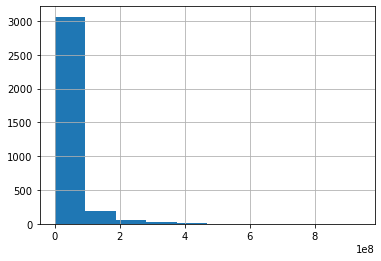

In [7]:
bom_movie_gross['domestic_gross'].hist();

<AxesSubplot:>

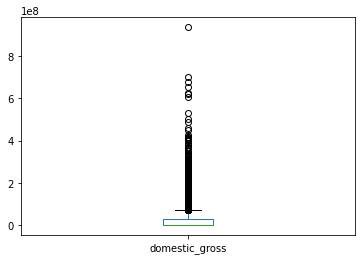

In [8]:
bom_movie_gross['domestic_gross'].plot.box()

In [9]:
bom_group_year = bom_movie_gross.groupby('year')['domestic_gross'].sum()/10e4
bom_group_year

year
2010    101569.26399
2011    100641.58200
2012    108766.05997
2013    107923.29897
2014    103377.38499
2015    110514.05394
2016    112536.53097
2017    109332.66198
2018    110912.09899
Name: domestic_gross, dtype: float64

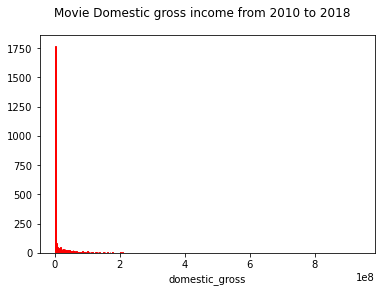

In [10]:
figure, axes = plt.subplots();

bom_gross_dropna = bom_movie_gross['domestic_gross'].dropna()
x = bom_movie_gross['domestic_gross'].dropna().apply(int)
figure.suptitle('Movie Domestic gross income from 2010 to 2018')
axes.hist(x, bins=500, edgecolor='red')
axes.set_xlabel('domestic_gross');

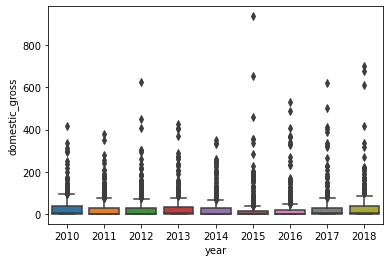

In [11]:
sns.boxplot(
    y=bom_gross_dropna /10e5,
    x=bom_movie_gross['year']
);

In [12]:
# bom_movie_gross.hist(bom_movie_gross['domestic_gross'].dropna(), bins=10);

### Name database
Let's explore the database of people involved in the movies from imdb

In [13]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [15]:
title_basics.describe(include='all')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt3548664,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN


In [16]:
title_basics.groupby('genres').count()

,tconst,primary_title,original_title,start_year,runtime_minutes
genres,,,,,
Action,2219,2219,2219,2219,1153
"Action,Adult,Comedy",2,2,2,2,1
"Action,Adventure",114,114,114,114,81
"Action,Adventure,Animation",197,197,197,197,173
"Action,Adventure,Biography",34,34,34,34,29
...,...,...,...,...,...
"Thriller,War,Western",1,1,1,1,1
"Thriller,Western",4,4,4,4,2
War,131,131,131,131,60


In [17]:
title_basics.groupby('start_year').count()

,tconst,primary_title,original_title,runtime_minutes,genres
start_year,,,,,
2010,11849,11849,11849,9986,11452
2011,12900,12900,12900,10707,12432
2012,13787,13787,13786,11405,13356
2013,14709,14709,14708,12308,14298
2014,15589,15589,15589,12964,15095
2015,16243,16243,16242,13252,15569
2016,17272,17272,17269,13514,16353
2017,17504,17504,17494,13466,16816
2018,16849,16849,16846,12213,16293


There are `146144` entries in the database. `original_title`, `runtime_minutes`, `types`, `attributes` and `genres` have some missing columns.

The dataset contains 8 columns:
1. tconst (string) - alphanumeric unique identifier of the title
2. titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
3. primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
4. originalTitle (string) - original title, in the original language
5. isAdult (boolean) - 0: non-adult title; 1: adult title
6. startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
7. endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
8. runtimeMinutes – primary runtime of the title, in minutes
9. genres (string array) – includes up to three genres associated with the title separated by commas

> Information about the columns can be found here - [IMDB title basics](https://developer.imdb.com/non-commercial-datasets/#titlebasicstsvgz)

---

### [4.Title rating](#4.Title-rating)
Let's explore the movie titles' crew

In [18]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [19]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are `73856` entries in the database. No columns are missing any data
The dataset contains 3 columns:

1. tconst (string) - alphanumeric unique identifier of the title
2. averageRating – weighted average of all the individual user ratings
3. numVotes - number of votes the title has received

Information about the columns can be found here - [IMDB title ratings](https://developer.imdb.com/non-commercial-datasets/#titleratingstsvgz)

---

### Glossary
[Domestic](https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#:~:text=around%20the%20world.-,What%20do%20%22domestic%22%20and%20%22international%22%20mean%3F,-%22Domestic%22%20refers%20to)

The gross columns contains figures rounded up to 4 significant figures. Reference [BOM]()

## 2. Data Preparation

Based on exploring the datasets above, we can prepare them for further analysis by cleaning the data which includes:
1. Standardize the format of some columns of the data.
2. Identify missing values and use appropriate methods to handle them.
3. Create additional columns if need be, to obtain more insights.
4. Drop unnecessary columns.

### 2.1 Box Office Mojo

In [20]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
# Copy the dataframe to use in cleaning
bom_gross_clean = bom_movie_gross.copy()
bom_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [22]:
# Find percentage of missing values in the dataframe
bom_gross_clean.isna().sum() / bom_gross_clean.shape[0] * 100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

1. The studio, domestic and foreign gross columns have some missing values which have to be handled appropriately.
2. The foreign gross column has an object data type `string` which can be converted to `int` to use in further analysis and plotting.
3. The dataset does not contain a column for genre thus not useful in getting insights about trends in genres.
4. The year column can be used to group data and find gross income statistics per year.
5. Further research can be done on the missing `studio` columns to see if they can be filled with correct values.

In [23]:
bom_gross_clean['studio'].value_counts()

IFC         166
Uni.        147
WB          140
Fox         136
Magn.       136
           ... 
CFI           1
FOR           1
OMNI/FSR      1
Blue Fox      1
PDF           1
Name: studio, Length: 257, dtype: int64

In [24]:
# Find rows with missing data in the studio column
bom_movie_gross[bom_gross_clean['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [25]:
# Standardize the studio names to uppercase/lowercase
# so as to make searching more effective if part of the name is searched
bom_gross_clean['studio'] = bom_gross_clean['studio'].apply(lambda studio: str(studio).upper())
bom_gross_clean['studio'].sample(5)

3109           UNI.
3182    GLOBAL ROAD
2113           MBOX
921             FOX
2105          FOCUS
Name: studio, dtype: object

In [26]:
# Replace the missing columns with data from further online search
bom_gross_clean.at[210, 'studio'] = 'COHEN' # Cohen Media Group
bom_gross_clean.at[555, 'studio'] = 'UNI.' # Universal Pictures
bom_gross_clean.at[933, 'studio'] = 'LIONSGATE'
bom_gross_clean.at[1862, 'studio'] = 'INDELIBLE MEDIA'
bom_gross_clean.at[2825, 'studio'] = 'AAMIR KHAN PRODUCTIONS'

In [27]:
bom_gross_clean.loc[2825, 'studio']

'AAMIR KHAN PRODUCTIONS'

Info on studios was extracted from Wikipedia and IMDB search after which I searched the dataset for studio names that have part of if not the entire name of the studio. e.g `Uni.` for `Universal Pictures`.
1. [Secret Superstar](https://www.imdb.com/title/tt6108090/companycredits/?ref_=tt_dt_co#production)
2. [Plot for Peace](https://www.imdb.com/title/tt2679680/companycredits/?ref_=tt_dt_co#production)
3. [Outside the Law](https://www.imdb.com/title/tt1229381/companycredits/?ref_=tt_dt_co#distribution)
4. [Fireflies in the Garden - Wikipedia](https://www.google.com/search?q=fireflies+in+the+garden&sca_esv=579611265&ei=AZlHZeGoEu-J9u8PpNikmAM&gs_ssp=eJzj4tLP1TcwKis0NCszYPQST8ssSk3LyUwtVsjMUyjJSFVITyxKSc0DANk0DDo&oq=fireflies+in+the&gs_lp=Egxnd3Mtd2l6LXNlcnAiEGZpcmVmbGllcyBpbiB0aGUqAggAMgUQLhiABDIFEC4YgAQyBRAAGIAEMgUQLhiABDIFEAAYgAQyBRAAGIAEMgUQLhiABDIFEAAYgAQyBRAAGIAEMgUQLhiABDIjEC4YgAQYlwUY3AQY3gQY4AQY9AMY8QMY9QMY9gMY9wPYAQFIqEFQ0QpY-jhwA3gBkAEAmAGbA6ABsyaqAQgyLTE2LjEuMbgBA8gBAPgBAcICChAAGEcY1gQYsAPCAgcQLhiKBRhDwgIREC4YgwEYxwEYsQMY0QMYgATCAgsQABiABBixAxiDAcICCxAAGIoFGLEDGIMBwgILEC4YgAQYsQMYgwHCAhYQLhiKBRhDGJcFGNwEGN4EGN8E2AEBwgIHEAAYigUYQ8ICDhAuGIAEGLEDGMcBGNEDwgIEEAAYA8ICCxAuGIMBGLEDGIAEwgIIEAAYgAQYsQPCAggQLhiKBRiRAsICDhAuGIoFGLEDGIMBGJECwgIKEAAYigUYsQMYQ8ICChAuGLEDGIoFGEPCAgoQLhiKBRixAxhDwgImEC4YigUYkQIYlwUY3AQY3gQY4AQY9AMY8QMY9QMY9gMY9wPYAQHCAgoQLhiKBRjUAhhDwgIdEC4YigUYsQMYgwEYkQIYlwUY3AQY3gQY4ATYAQHCAg4QLhiKBRixAxjUAhiRAsICDRAuGIoFGLEDGIMBGEPCAg0QABiKBRixAxiDARhDwgILEAAYigUYsQMYkQLCAg4QLhjUAhixAxiKBRiRAsICCxAuGIAEGMcBGK8BwgIdEC4Y1AIYsQMYigUYkQIYlwUY3AQY3gQY3wTYAQHCAhQQLhiABBiXBRjcBBjeBBjfBNgBAcICIxAuGIAEGJcFGNwEGN4EGOAEGPQDGPEDGPUDGPYDGPcD2AEBwgIHEAAYgAQYCuIDBBgAIEGIBgGQBgi6BgYIARABGBQ&sclient=gws-wiz-serp)
5. [Keith Lemon:The Film]()

In [28]:
# For the domestic_gross column, let's get the statistics (i.e mean, mode, median)
bom_mean_domestic_gross = bom_gross_clean['domestic_gross'].mean()
bom_median_domestic_gross = bom_gross_clean['domestic_gross'].median()
bom_mode_domestic_gross = bom_gross_clean['domestic_gross'].mode(dropna=False)

print(f"Mean: {bom_mean_domestic_gross}")
print(f"Median: {bom_median_domestic_gross}")
print(f"Mode: {bom_mode_domestic_gross}")

Mean: 28745845.06698422
Median: 1400000.0
Mode: 0    1100000.0
dtype: float64


The mean is rather higher than the median, possibly due to movies/series that had very high gross income.
Let's plot a boxplot to see them

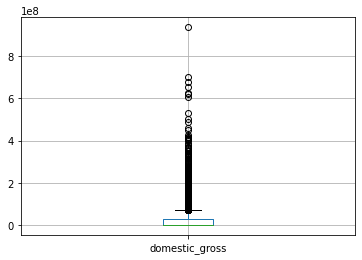

In [29]:
bom_movie_gross.boxplot(column='domestic_gross');

* The boxplot shows that most gross sales lie at `1400000.0 million dollars` with some movies having larger sales.
* The mean sales is around `28745845.06698422 million dollars` which could be influenced by the higher amount of sales in other movies.
* We can fill the null values in the dataset with the median gross sales to account for the missing `0.826690%` which is much less than half of the total entries to consider dropping or other methods

In [30]:
bom_domestic_gross_null_before = bom_gross_clean['domestic_gross'].isna().sum()
bom_gross_clean['domestic_gross'].fillna(bom_gross_clean['domestic_gross'].median(), inplace=True)
bom_domestic_gross_null_after = bom_gross_clean['domestic_gross'].isna().sum()
print(f"Null values before: {bom_domestic_gross_null_before}")
print(f"Null values after: {bom_domestic_gross_null_after}")

Null values before: 28
Null values after: 0


In [31]:
bom_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [32]:
# For the foreign_gross, it has ~40% of mising data. Let's convert the column to float and calculate the statistics
# bom_movie_gross['foreign_gross'].apply(float)

In [33]:
# It appears a value has a comma which can break the conversion, let's clean them out.
bom_gross_clean['foreign_gross'].loc[bom_gross_clean['foreign_gross'] == '1,131.6']

1872    1,131.6
Name: foreign_gross, dtype: object

In [34]:
bom_gross_clean['foreign_gross'] = bom_gross_clean['foreign_gross'].apply(lambda x: float(str(x).replace(",", "")))
bom_gross_clean

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,MAGN.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,SONY,2500.0,NaN,2018
3385,The Swan,SYNERGETIC,2400.0,NaN,2018


In [35]:
bom_gross_clean.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

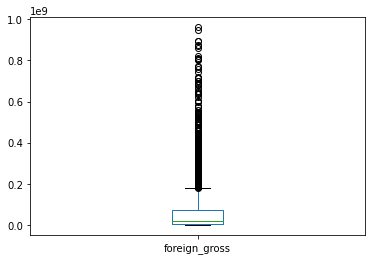

In [36]:
bom_gross_clean['foreign_gross'].plot.box();

In [37]:
bom_mean_foreign_gross = bom_gross_clean['foreign_gross'].mean()
bom_median_foreign_gross = bom_gross_clean['foreign_gross'].median()
bom_mode_foreign_gross = bom_gross_clean['foreign_gross'].mode(dropna=False)

print(f"Mean: {bom_mean_foreign_gross}")
print(f"Median: {bom_median_foreign_gross}")
print(f"Mode: {bom_mode_foreign_gross}")

Mean: 74872810.15046637
Median: 18700000.0
Mode: 0   NaN
dtype: float64


* The boxplot shows that most gross sales lie at `~18million dollars` with some movies having larger sales.
* The mean sales is around `~74million dollars` which could be influenced by the higher amount of sales in other movies.
* We can fill the null values in the dataset with the median gross sales to account for the missing `39.858282%` which is less than half of the total entries.

In [38]:
bom_foreign_gross_null_before = bom_gross_clean['foreign_gross'].isna().sum()
bom_gross_clean['foreign_gross'].fillna(bom_gross_clean['foreign_gross'].median(), inplace=True)
bom_foreign_gross_null_after = bom_gross_clean['foreign_gross'].isna().sum()
print(f"Null values before: {bom_foreign_gross_null_before}")
print(f"Null values after: {bom_foreign_gross_null_after}")

Null values before: 1350
Null values after: 0


In [39]:
bom_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


## 3. Data Modelling

Let's now plot some various graphs to visualize and get insights from our cleaned dataset.

### 3.1 Box Office Mojo

In [40]:
list(bom_gross_clean['year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [41]:
bom_gross_clean['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

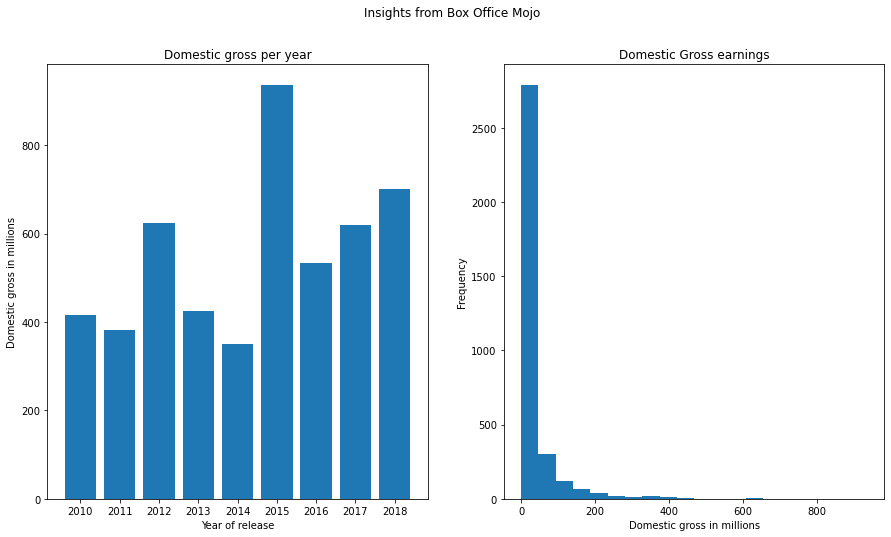

In [42]:
figure, (axes1, axes2) = plt.subplots(figsize=(15,8), ncols=2)
figure.suptitle("Insights from Box Office Mojo")

domestic_gross = bom_gross_clean['domestic_gross'] / 10e5
years = bom_gross_clean['year']
axes1.bar(x=years, height=domestic_gross)
axes1.set_title("Domestic gross per year")
axes1.set_xlabel("Year of release")
axes1.set_ylabel("Domestic gross in millions")
axes1.set_xticks(np.linspace(years.min(), years.max(), years.nunique()))

axes2.hist(domestic_gross, bins=20)
axes2.set_title("Domestic Gross earnings")
axes2.set_xlabel("Domestic gross in millions")
axes2.set_ylabel("Frequency");

The gross earnings are positively skewed in the dataset

In [43]:
top_20_domestic_gross = bom_gross_clean.sort_values(by='domestic_gross', ascending=False).head(20)
top_20_domestic_gross

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,UNI.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


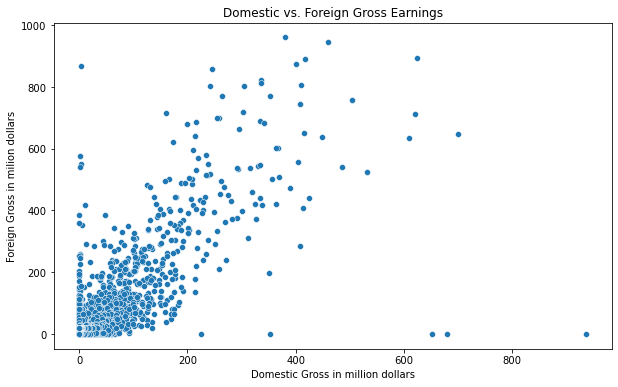

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bom_gross_clean['domestic_gross']/10e5, y=bom_gross_clean['foreign_gross']/10e5, data=bom_gross_clean)
plt.title('Domestic vs. Foreign Gross Earnings')
plt.xlabel('Domestic Gross in million dollars')
plt.ylabel('Foreign Gross in milion dollars')
plt.show()

There is a `positive` relationship between foreign and gross income

In [45]:
top_20_foreign_gross = bom_gross_clean.sort_values(by='foreign_gross', ascending=False).head(20)
top_20_foreign_gross

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,UNI.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,PAR.,245400000.0,858600000.0,2014
1876,Minions,UNI.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


### 3.2 IMDB

Let's take a look at the ratings for movies.

In [46]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [47]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [48]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


1. We only have `73856` records in the ratings table while the basics table has `146144` records.
2. The common column in both is the tcont which isthe unique identifier for a movie/series.
3. We can combine the two tables using this column as the index using aleft join to the ratings table so as to find insights for movies that have ratings.

In [49]:
title_basics.set_index('tconst', inplace=True)
title_ratings.set_index('tconst', inplace=True)

In [50]:
title_basics_clean = title_basics.copy()
title_ratings_clean = title_ratings.copy()

In [51]:
joined_movie_ratings = title_ratings_clean.join(title_basics_clean)
joined_movie_ratings

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"


In [52]:
joined_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    73856 non-null  float64
 1   numvotes         73856 non-null  int64  
 2   primary_title    73856 non-null  object 
 3   original_title   73856 non-null  object 
 4   start_year       73856 non-null  int64  
 5   runtime_minutes  66236 non-null  float64
 6   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [53]:
joined_movie_ratings.isna().sum() / joined_movie_ratings.shape[0] * 100

averagerating       0.000000
numvotes            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
dtype: float64

In [54]:
# 10.31% of runtime_minutes is missing in the dataset and 1.09% of genres as well

In [55]:
joined_movie_ratings.describe(include='all')

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
count,73856.000000,7.385600e+04,73856,73856,73856.000000,66236.000000,73052
unique,NaN,NaN,69993,71097,NaN,NaN,923
top,NaN,NaN,The Return,Broken,NaN,NaN,Drama
freq,NaN,NaN,11,9,NaN,NaN,11612
mean,6.332729,3.523662e+03,NaN,NaN,2014.276132,94.654040,NaN
std,1.474978,3.029402e+04,NaN,NaN,2.614807,208.574111,NaN
min,1.000000,5.000000e+00,NaN,NaN,2010.000000,3.000000,NaN
25%,5.500000,1.400000e+01,NaN,NaN,2012.000000,81.000000,NaN
50%,6.500000,4.900000e+01,NaN,NaN,2014.000000,91.000000,NaN
75%,7.400000,2.820000e+02,NaN,NaN,2016.000000,104.000000,NaN


* The average rating for movies is `6.33`.
* The average runtime for a movie is `94.65` minutes.

In [56]:
# joined_movie_ratings.plot.bar()

In [63]:
num_votes = joined_movie_ratings['numvotes']
movie_title = joined_movie_ratings['primary_title']
movie_genres = joined_movie_ratings['genres']

In [64]:
num_votes.shape

(73856,)

In [65]:
movie_title.shape

(73856,)

In [75]:
movie_genres.fillna(movie_genres.mode()[0], inplace=True)

In [ ]:
# joined_movie_ratings.groupby('genres').median().sort_values('averagerating', ascending=False)

In [76]:
# sns.barplot(x=num_votes, y=movie_title, hue=movie_genres)

KeyboardInterrupt: 

In [ ]:
top_20 = joined_movie_ratings.head(10).sort_values(by='averagerating', ascending=False)
top_20

In [ ]:
sns.barplot(data=top_20, y='primary_title', x='averagerating', hue='start_year');

In [ ]:
joined_movie_ratings.sort_values(by='averagerating', ascending=False).head(20)

In [ ]:
genres = joined_movie_ratings['genres'].dropna().apply(lambda genre: genre.replace(',', " "))
genres

In [ ]:
all_genres = []
for genre in genres:
    for g in genre.split():
        all_genres.append(g)
all_genres = pd.Series(all_genres)
all_genres.head()

In [ ]:
all_genres.value_counts().head(10)

Drama, Documentary and Comedy are the most common genres for movies

In [ ]:
joined_movie_ratings.groupby('genres').mean().sort_values('averagerating', ascending=False)

In [ ]:
## Number of votes